# About Data

Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool was used to extract features from images.

# Data Description

1- VWTI: Variance of Wavelet Transformed Image<br>
2- SWTI: Skewness of Wavelet Transformed Image<br>
3- CWTI: Curtosis of Wavelet Transformed Image<br>
4- EI: Entropy of Image<br>
5- Class: Class (1: genuine, 0: forged)

# Import Packages

In [84]:
%tensorflow_version 2.x

from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
print(tf.__version__)

2.3.0


# Loading the dataset

In [85]:
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

# Visualise the data

In [86]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [87]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


The above concludes that we have 1096 rows and all are not null.

In [88]:
bank_note_data.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


The data is not on the samescale as can be concluded from above.

# Ploting graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3dd227cc0>,
      dtype=object)

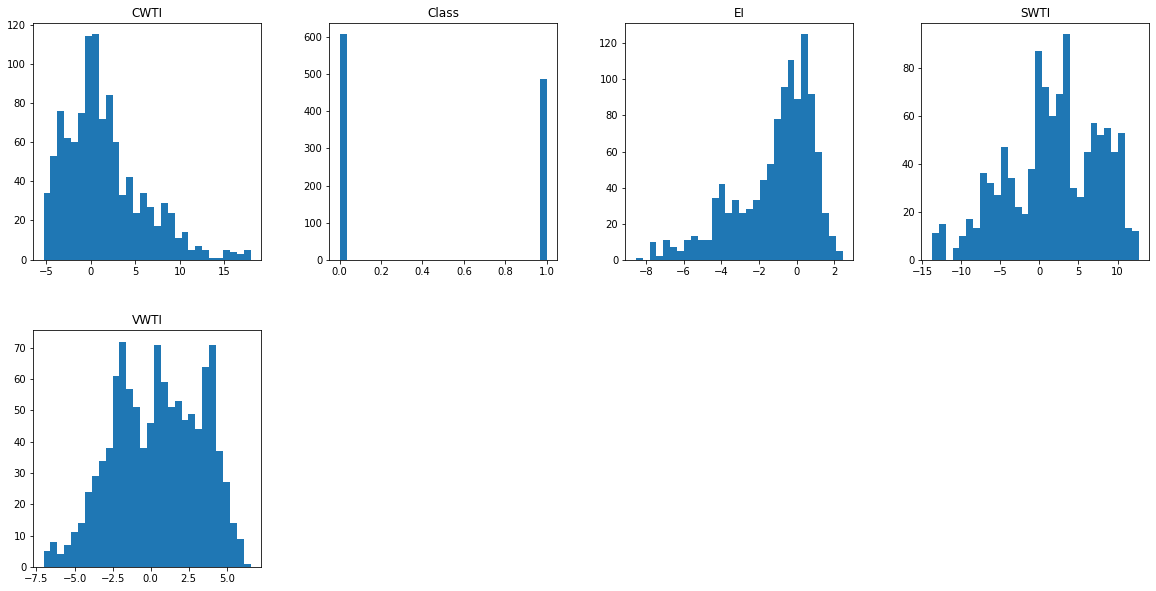

In [89]:
bank_note_data.hist(figsize=(20,10), grid =False, layout = (2,4), bins=30)

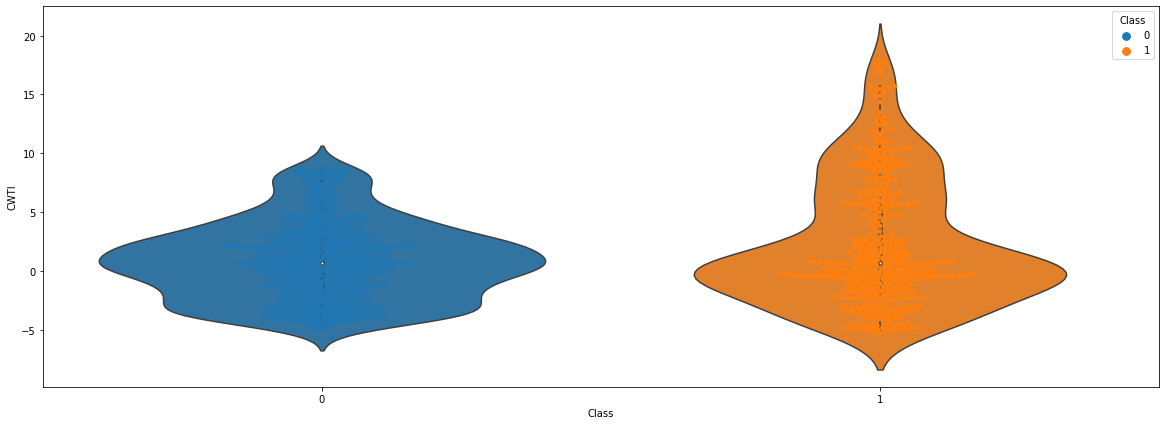

In [90]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Class', y = 'CWTI', data = bank_note_data, hue = 'Class')
sns.violinplot(x = 'Class', y = 'CWTI', data = bank_note_data)

# Scaling

In [91]:
#Standardize rows into uniform scale.

X= bank_note_data.drop(['Class'], axis=1)
y= bank_note_data['Class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

#Scale and centre the data

bank_note_data_normalized = scaler.transform(X)

#Create a pandas dataframe

bank_note_data_normalized = pd.DataFrame(data = X, index= X.index, columns= X.columns)

In [92]:
bank_note_data_normalized.describe()

,VWTI,SWTI,CWTI,EI
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454
std,2.852623,5.922621,4.375655,2.084983
min,-7.036400,-13.773100,-5.286100,-8.548200
25%,-1.790850,-2.125200,-1.574975,-2.246975
50%,0.540430,2.205850,0.671900,-0.569190
75%,2.835350,6.793925,3.574450,0.399980
max,6.563300,12.730200,17.927400,2.449500


# Split the data

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=bank_note_data['Class'])

In [94]:
X_train.shape

(767, 4)

In [95]:
X_test.shape

(329, 4)

In [96]:
y_train.shape

(767,)

In [97]:
y_test.shape

(329,)

# Build the Model

In [101]:
#Create a Sequential model
from keras.layers import Dropout
model = tf.keras.Sequential()
model.add(Dropout(0.2, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))

#Output Layer
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

#Create a Keras version Optimiser
optimizer = tf.keras.optimizers.Adam()

#Compile and print the summary of model
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics =['accuracy'])

# Model summary can be created by calling the summary() function on the model that returns a string that in turn can be printed.
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


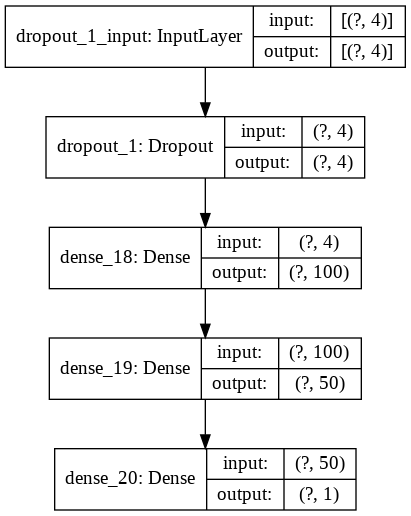

In [102]:
#Plot model summary

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [103]:
fitted_model = model.fit(
        X_train, y_train,
        epochs=50  
        )

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7497
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8827
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.8931
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2519 - accuracy: 0.8853
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.8957
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9153
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.8970
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9257
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9140
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9244
Epoch 11/50
24/24 [

In [104]:
eval = model.evaluate(X_test, y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval[0],eval[1]*100))


Loss, accuracy on test data: 
0.0445 99.70%


# Prediction with New Test data

In [105]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [106]:
test_data.describe()

,VWTI,SWTI,CWTI,EI
count,275.000000,275.000000,275.000000,275.000000
mean,0.363297,2.462609,1.030690,-1.330679
std,2.805872,5.624348,4.024623,2.165304
min,-7.042100,-13.497900,-5.215900,-7.871900
25%,-1.640650,-0.990160,-1.546900,-2.696950
50%,0.118060,2.752100,0.180500,-0.719840
75%,2.642950,7.019000,2.420700,0.368950
max,6.824800,12.951600,17.677200,1.928400


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(test_data)

#Scale and centre the data

test_data_normalised = scaler.transform(test_data)

#Create a pandas dataframe

test_data_normalised = pd.DataFrame(data = test_data, index= test_data.index, columns= test_data.columns)

In [113]:
y_pred = model.predict_classes(test_data_normalised)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# Saving the Prediction

In [114]:
#Saving Prediction

Class = pd.DataFrame(y_pred)
Class.index = test_data_normalised.index
Class.columns = ['Class']
Class.to_csv('prediction_result_classes.csv') 

In [112]:
ls

model_plot.png  prediction_result_class.csv  sample_data/
